<h1 style="display: inline-block;"> Integração de Objetos <br> com IPython </h1> <h4 style="display: inline-block; float: right;"> 6- ObjetosIPython.ipynb </h4>
* Visualização
  * svg, png, jpeg, html, javascript, latex
* Opções de Autocompletar
---
* Traceback de exceções

### Visualização

* Defina um método ```_repr_*_(self)```
  * svg, png, jpeg, html, javascript, latex

In [1]:
class Raiz:
    def __init__(self, numero):
        self.numero = numero
    
    def formula(self):
        text = self.numero
        if hasattr(self.numero, "formula"):
            text = self.numero.formula()
        return "\sqrt{%s}" % (text,)
    
    def _repr_latex_(self):
        return "$${}$$".format(self.formula())
    
Raiz(25)

In [2]:
Raiz(Raiz(25))

In [3]:
import os
from subprocess import Popen, PIPE as P

class Grafo:
    def __init__(self, adjacentes):
        self.adjacentes = adjacentes
    
    def dottext(self):
        result = [
            "  {} -> {};".format(no, adjacente)
            for no, lista in self.adjacentes.items()
            for adjacente in lista
        ]
        return "digraph G {{\n  ranksep=0.25;\n{}\n}}".format("\n".join(result))

    def dot(self, format="png"):  # ToDo: Tratar erro
        kwargs = {} if os.name != 'nt' else {"creationflags": 0x08000000}
        p = Popen(['dot', '-T', format], stdout=P, stdin=P, stderr=P, **kwargs)
        return p.communicate(self.dottext().encode('utf-8'))[0]
    
    def __repr__(self):
        return self.dottext()
    
    def _repr_svg_(self):
        return self.dot("svg").decode("utf-8")
    
    def _repr_png_(self):
        return self.dot("png")
    

texto_desta_celula = "\n".join(In[-1].split("\n")[:-1])

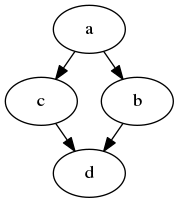

In [4]:
grafo = Grafo({"a": ["b", "c"], "b": ["d"], "c": ["d"]})
grafo

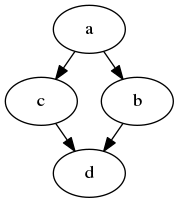

In [5]:
from IPython.display import display_png
display_png(grafo)

In [6]:
from IPython.display import display_pretty
display_pretty(grafo)

digraph G {
  ranksep=0.25;
  c -> d;
  a -> b;
  a -> c;
  b -> d;
}

#### Bonus 1 - imprimindo execução

In [7]:
from collections import defaultdict
class GrafoExecucao(Grafo):
    
    def __init__(self, func):
        self.func = func
        self.adjacentes = defaultdict(list)
        self.pai = "root"
    
    def __call__(self, *args, **kwargs):
        if "reset" not in kwargs or kwargs["reset"]:
            self.adjacentes = defaultdict(list) 
        pai_velho = self.pai
        nome = "{}_{}".format(self.func.__name__, "_".join(map(str, args)))
        self.pai = nome
        self.adjacentes[pai_velho].append(nome)
        resultado = self.func(*args, **kwargs)
        self.pai = pai_velho
        return resultado

In [8]:
@GrafoExecucao
def fib(n, reset=True):
    if n <= 1:
        return n
    return fib(n - 1, reset=False) + fib(n - 2, reset=False)

In [9]:
fib(6)

8

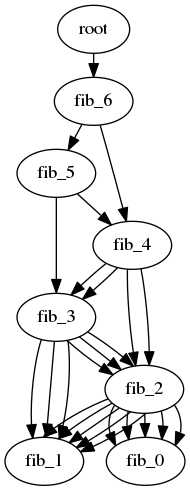

In [10]:
fib

In [11]:
with open("grafo.py", "w") as file:
    file.write(texto_desta_celula)

### Autocompletar

* IPython usa a função ```dir```: sobrescreva ```__dir__```

In [12]:
from string import ascii_letters

class Alfabeto:
    def __getattr__(self, letter):
        return ord(letter.lower()) - ord('a') + 1
    
    def __dir__(self):
        return list(ascii_letters)
    
alfabeto = Alfabeto()

In [13]:
alfabeto.J

10

In [ ]:
from IPython.display import Image
Image("autocompletar2.png")

https://github.com/JoaoFelipe/presentations/20161210_PythonRio  

<span style="font-size:1.5em;" id="slidepagination"> [<(5) Extensões](Extensoes.ipynb) (6) [Extensão IPython (7)>](ExtensaoIPython.ipynb) </span>
&nbsp;


In [1]:
import pagination

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>